In [4]:
from helper_fn import *
import seaborn as sns

## Downloading the following dataframes

1. df
2. df600
3. df_label: PEMAT-labelled dataset.

NOTE: https:// creates problems with word_count distribution.

In [5]:
# NOTE: df should have 56 columns because we don't have labels on actionability, understandability, etc.
df = pd.read_csv("merged_and_cleaned12k.csv", sep = ",").dropna(how = "all").drop(columns = ["Unnamed: 0"])
df600 = pd.read_csv("merged_and_cleaned600.csv", sep = ",").drop(columns = ["Unnamed: 0"])
df_label = pd.read_csv("rawPEMAT.csv", sep = ",").drop(columns = ["Unnamed: 0"])

In [6]:
# Load the dictionary of PEMAT. 
# Plan: Work back and forth between the PEMAT raw file (df_label) and the cleaned file (df600).
f = open("PEMAT_dict.pkl","rb")
PEMAT_dict = pickle.load(f)

In [7]:
# Merge videos that appear multiple times under different keywords. 
groupby_column = 'video_id'
aggregate_column = 'keyword'
agg_df = df.groupby(groupby_column).aggregate({aggregate_column: list})
df_alias = df.drop(columns=aggregate_column).set_index(groupby_column)
agg_df = agg_df.join(df_alias).reset_index(groupby_column).drop_duplicates(groupby_column).reset_index(drop=True)

df = agg_df

# PART 1: Descriptive Statistics

First, I examined the features and classified them into three categories. 
1. Video metadata
2. Video 
3. Usage statistics



**NOTE: See merge_and_cleaned for a description on the PEMAT labels. This is a descriptive statistics on the entire dataset.

## Useful resource
1. ARI: https://en.wikipedia.org/wiki/Automated_readability_index
2. Flesch reading ease:
3. Kincaid (formally titled: Flesch-Kincaid readability). https://readable.com/readability/flesch-reading-ease-flesch-kincaid-grade-level/
4. Cosine similarity: https://www.machinelearningplus.com/nlp/cosine-similarity/

## Appropriate ranges
1. ARI: 1-14
2. Kincaid: 0-19; 
3. Flesch: 0-100.
4. cosine similarity -1 to 1; 

In [8]:
# Checking the summary statistics for each of these features. 
fare = ["min", "max", "median", "mean"]
temp = {}

# Labels
label = ["info","understand","action"]

# Video metadata
readable = ['ARI', 'FleshReadingEase','Kincaid']

# Derivatives of video metadata
description_d = ["word_unique", "transition_words","summary_words","active_verb", "word_count", "sentence_count"]
keyword = ['keyword_title_cosine', 'keyword_decription_cosine']
channel = ['channelSubscriberCount', "channelViewCount", "channelCommentCount", "channelVideoCount"] # TODO: Log
duration = ["video_duration"] # Is already an integer
contentLicensed = ["contentLicensed"]
# Miscellaneous
rank = ["rank"]
content = ["contentDefinition", "contentLicensed"]

# Usage statistics (outcome metrics)
like_dislike_view = ["likeCount", "dislikeCount", "viewCount"] # TODO: Log-transform
comment_cosine = ['comment_title_cosine', 'comment_description_cosine', ]
comment_d = ['commentCount','postive_comment_count','negative_comment_count','neutral_comment_count', 
           "comment_unique_words", "comment_total_words"]

In [9]:
summaryStatistics(df600, label)

,info,understand,action
min,0.00,0.00,0.00
max,1.00,1.00,1.00
median,1.00,1.00,0.00
mean,0.68,0.75,0.47


In [34]:
df600

,URL,Duration,info,action,understand,ARI,FleshReadingEase,Kincaid,active_verb,has_description,...,topicIds,comment_total_words,postive_comment_count,keyword_title_cosine,comment_description_cosine,comment_unique_words,keyword_decription_cosine,neutral_comment_count,negative_comment_count,comment_title_cosine
0,-32U9eU1hdM,310,1.00,0,1,14.52,28.51,13.75,59.00,1.00,...,NaN,290.00,14.00,0.00,2.53,257.00,0.02,4.00,4.00,0.71
1,-71ld0iqAq8,602,1.00,0,1,9.06,52.87,8.75,31.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00
2,-8HmZjScLe0,732,0.00,0,0,21.83,70.67,10.03,42.00,1.00,...,NaN,"3,603.00",90.00,0.28,3.22,"2,789.00",0.00,5.00,5.00,2.46
3,-Aj5BTnz-v0,559,1.00,1,1,15.78,25.99,13.21,23.00,1.00,...,NaN,261.00,9.00,0.28,1.23,234.00,0.02,6.00,3.00,0.45
4,-IaysvX1L8U,246,1.00,0,1,12.51,45.13,11.97,16.00,1.00,...,NaN,104.00,3.00,0.19,0.27,95.00,0.04,1.00,1.00,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,zLbAxztnnfE,163,0.00,0,0,19.30,19.81,16.74,77.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
617,zPdwsCTp4gM,751,1.00,0,1,8.49,65.03,7.58,6.00,1.00,...,NaN,70.00,1.00,0.47,0.09,54.00,0.00,0.00,1.00,0.00
618,zU-5GcqzHNM,819,1.00,1,1,16.95,62.72,12.56,17.00,1.00,...,NaN,"5,239.00",47.00,0.07,8.14,"3,715.00",0.14,17.00,36.00,3.46
619,z_3S2_41_FE,300,1.00,0,1,9.27,75.98,7.75,32.00,1.00,...,NaN,"2,684.00",38.00,0.00,8.46,"2,178.00",0.18,33.00,29.00,5.21


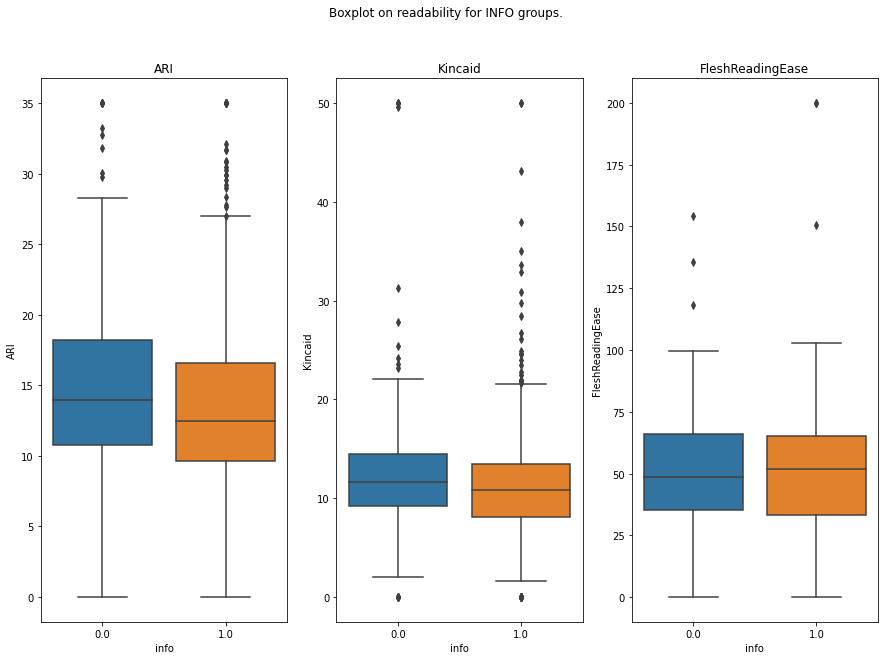

In [44]:
# The rest would be:
# 1. Create a function
# 2. 
a4_dims = (15,10)
col_lst = ["ARI", "Kincaid", "FleshReadingEase"]
lb_lst = [0,0,0]
ub_lst = [35, 50, 200]
groupname = "info"

fig, ax = plt.subplots(1, 3, figsize=a4_dims)
fig.suptitle('Boxplot on readability for %s groups.' %(groupname.upper()))
for i, col in enumerate(col_lst):
    dfcopy = truncateColumn(df600, lb_lst[i], ub_lst[i], col)
    ax[i].set_title("%s" %(col))
    sns.boxplot(ax=ax[i], data = dfcopy, x = groupname, y = col)


,URL,Duration,info,action,understand,ARI,FleshReadingEase,Kincaid,active_verb,has_description,...,topicIds,comment_total_words,postive_comment_count,keyword_title_cosine,comment_description_cosine,comment_unique_words,keyword_decription_cosine,neutral_comment_count,negative_comment_count,comment_title_cosine
0,-32U9eU1hdM,310,1.00,0,1,10.00,28.51,13.75,59.00,1.00,...,NaN,290.00,14.00,0.00,2.53,257.00,0.02,4.00,4.00,0.71
1,-71ld0iqAq8,602,1.00,0,1,9.06,52.87,8.75,31.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00
2,-8HmZjScLe0,732,0.00,0,0,10.00,70.67,10.03,42.00,1.00,...,NaN,"3,603.00",90.00,0.28,3.22,"2,789.00",0.00,5.00,5.00,2.46
3,-Aj5BTnz-v0,559,1.00,1,1,10.00,25.99,13.21,23.00,1.00,...,NaN,261.00,9.00,0.28,1.23,234.00,0.02,6.00,3.00,0.45
4,-IaysvX1L8U,246,1.00,0,1,10.00,45.13,11.97,16.00,1.00,...,NaN,104.00,3.00,0.19,0.27,95.00,0.04,1.00,1.00,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,zLbAxztnnfE,163,0.00,0,0,10.00,19.81,16.74,77.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
617,zPdwsCTp4gM,751,1.00,0,1,8.49,65.03,7.58,6.00,1.00,...,NaN,70.00,1.00,0.47,0.09,54.00,0.00,0.00,1.00,0.00
618,zU-5GcqzHNM,819,1.00,1,1,10.00,62.72,12.56,17.00,1.00,...,NaN,"5,239.00",47.00,0.07,8.14,"3,715.00",0.14,17.00,36.00,3.46
619,z_3S2_41_FE,300,1.00,0,1,9.27,75.98,7.75,32.00,1.00,...,NaN,"2,684.00",38.00,0.00,8.46,"2,178.00",0.18,33.00,29.00,5.21


In [ ]:
df600nu["ARI"]

In [ ]:
# Many channels have large total views. PCA for highly correlated variables?
var = "channelViewCount"
thresh = 10**6
col = ["rank", "keyword", "id", "understand", "title", "channelTitle"]
df600[df600[var] > thresh][col]

In [ ]:
# Perform histogram of the dataset.
var = "channelVideoCount"
entire = True

if entire == True:
    x = df[var]
    name = "entire dataset"
else:
    x = df600[var]
    name = "labelled dataset"
bins = [2**i for i in range(7)]
fig = plt.hist(x, density = False, facecolor='b', alpha=0.75)
plt.xlabel('%s' %(var))
plt.ylabel('Number of videos')
plt.title('%s distribution on %s' %(var,name))
plt.grid(True)

In [ ]:
# Check if columns of df600 and df are the same.
# Only difference: video_duration, understand, action, URL, which all appear in other forms already.
for col in df600.columns.tolist():
    if col not in df.columns.tolist():
        print(col)

In [ ]:
df600["contentLicensed"].value_counts()

# PART 2: Building models
In this part, I used Kincaid as a response variable. The dataset is the miniature 600 versions whereby we have the labels. The logistic regression model is built upon only numerical values. Overall, the accuracy is egregiously high (80%), suggesting that I might overfit?

In [ ]:
# Drop the indices with no_info. 
# Why: I have checked the data. These rows contains many NaN.
no_info = np.where(df600["info"].isna() == True)[0].tolist()
no_info += np.where(df600["viewCount"].isna() == True)[0].tolist()
df600 = df600.drop(index = no_info, columns = ["Unnamed: 0"])

In [ ]:
# Feature transform the readability indices
# Thought 1: Select only ARI due to highly corrleated

# ARI should be from 0-14
ub = 14
lb = 0
truncateColumn(df600, lb, ub, "ARI")
summaryStatistics(df, ["has_description"])

In [ ]:
need_to_dummy = ["contentDefinition"]
df600 = pd.get_dummies(df600, columns = need_to_dummy)
df600

# Results of each classification model

In [ ]:
# Model 1: Use every numerical variable
unsure = ["has_description"] + ["active_verb"]
sure = duration + keyword + ["ARI"] 

X = df600[sure + unsure]
y = df600["understand"]

# Set random_state = 1 to compare between models. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_calib, y_train, y_calib = train_test_split(X, y, test_size = 0.12, random_state = 1)

In [ ]:
# Testing for logistic regression
model_name = "Logistic"
X_test, y_test, model = testClassifier(X, y, model_name)
createROC(X_test, y_test, model, model_name)

In [ ]:
# Testing SVM
model_name = "SVM"
grid = {'kernel':['rbf'], 'C': np.arange(1,10,2)}
X_test, y_test, model = testClassifier(X, y, model_name, parameters = grid)
createROC(X_test, y_test, model, model_name)

In [ ]:
# Testing Random Forest
n_estimators = np.arange(10, 200, 20)
max_depth = np.arange(1,5)
grid = {'n_estimators':n_estimators, 'max_depth':max_depth}
model_name = "RandomForest"
X_test, y_test, model = testClassifier(X, y, model_name, parameters = grid)
createROC(X_test, y_test, model, model_name)

In [ ]:
temp = 0
for i in df["subtitle"].index.tolist():
    if len(df.iloc[i]["subtitle"]) > 20:
        temp += 1
print(temp)

# Performing topic modelling